# INSTALL IMPORT

In [ ]:
!pip install sentence_transformers
!pip install dataframe_image
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 1.5 MB/s 
     |████████████████████████████████| 5.5 MB 24.3 MB/s 
     |████████████████████████████████| 1.3 MB 67.3 MB/s 
     |████████████████████████████████| 163 kB 70.5 MB/s 
     |████████████████████████████████| 7.6 MB 53.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=99d29a6f763162ad3031edf2db7d4932e723fbcb620a4bd0758e552001f560bc
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
# !gdown --id 1iltCNiLZOAa9B9ZobZ3qXpznUIXFUhi3

In [ ]:
!gdown --id 1voq_K9Gjn0ZWtnh1LVmfNRxolh5uZeyV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1voq_K9Gjn0ZWtnh1LVmfNRxolh5uZeyV
To: /content/dbm_movies_final.tsv
100% 45.8M/45.8M [00:00<00:00, 191MB/s]


In [ ]:
import string
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import dataframe_image as dfi
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

# Read data

In [ ]:
df = pd.read_csv("/content/dbm_movies_final.tsv", sep="\t")

In [ ]:
df

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,keywords,crew,year,month,day,day_name,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.950000,Pixar Animation Studios,United States of America,...,7.7,5416.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...",1995,10,30,Monday,"Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.020000,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,6.9,2412.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...",1995,12,15,Friday,"Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.710000,"Warner Bros., Lancaster Gate",United States of America,...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...",1995,12,22,Friday,"Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.860000,Twentieth Century Fox Film Corporation,United States of America,...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...",1995,12,22,Friday,"Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.390000,"Sandollar Productions, Touchstone Pictures",United States of America,...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...",1995,2,10,Friday,"George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43282,False,0,Horror,289923,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.386500,"Neptune Salad Entertainment, Pirie Productions",United States of America,...,7.0,1.0,"witch, mythology, legend, serial killer, mocku...","Ben Rock, Ben Rock",2000,10,3,Tuesday,"Branwall, Sarah Didonna, Kyle Brody, Bill Barn...","Monty Bane, Lucy Butler, David Grammer, Bill D..."
43283,False,0,Science Fiction,222848,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661600,Concorde-New Horizons,United States of America,...,3.5,1.0,NaN,"Roger Corman, Mike Elliott, Aaron Osborne, Mik...",1995,1,1,Sunday,"Kira (as Cassandra Leigh), Daly, Ruggs, Lewis,...","Lisa Boyle, Kena Land, Zaneta Polard, Don Yana..."
43284,False,0,Drama,111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178200,Sine Olivia,Philippines,...,9.0,3.0,"artist, play, pinoy","Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, Lav...",2011,11,17,Thursday,"Sister Angela, Homer, Crazy Woman/Virgin, Aman...","Angel Aquino, Perry Dizon, Hazel Orencio, Joel..."
43285,False,0,NaN,227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003504,Yermoliev,Russia,...,0.0,0.0,NaN,"Yakov Protazanov, Joseph N. Ermolieff",1917,10,21,Sunday,", , , ,","Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav..."


In [ ]:
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

Memory usage of dataframe is 7.64 MB


In [ ]:
print("Number of columns: ", len(df.columns))
print("\nColumns: \n", df.columns)

Number of columns:  24

Columns: 
 Index(['adult', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'tagline', 'vote_average', 'vote_count', 'keywords', 'crew', 'year',
       'month', 'day', 'day_name', 'characters', 'actors'],
      dtype='object')


In [ ]:
df.isna().sum()

adult                       0
budget                      0
genres                   2287
id                          0
original_language           0
original_title              0
overview                    0
popularity                  0
production_companies    11291
production_countries     5921
revenue                     0
runtime                     0
spoken_languages         3687
tagline                     0
vote_average                0
vote_count                  0
keywords                13685
crew                      708
year                        0
month                       0
day                         0
day_name                    0
characters               2431
actors                   2284
dtype: int64

In [ ]:
df.fillna("unknown", inplace=True)

In [ ]:
df.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
tagline                 0
vote_average            0
vote_count              0
keywords                0
crew                    0
year                    0
month                   0
day                     0
day_name                0
characters              0
actors                  0
dtype: int64

# Visualization

In [ ]:
# plt.figure(figsize=(20,20))
# plt.title('The Most Common Word in Movie Overviews\n', fontsize=30, weight=600, color='#333d29')
# wc = WordCloud(max_words=1000, min_font_size=10,
#                 height=800,width=1600,background_color="white").generate(' '.join(df['overview']))

# plt.imshow(wc)

 the genres alone can be used to provide a reasonably good content based recommendation. But before that, we need to analyse some important aspects.

Which are the most popular genres?

In [ ]:
genre_popularity = (df.genres.str.split(', ')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama              19228
Comedy             12771
Thriller            7107
Romance             6387
Action              6262
Horror              4347
Crime               4071
Documentary         3819
Adventure           3285
Science Fiction     2869
Name: genres, dtype: int64

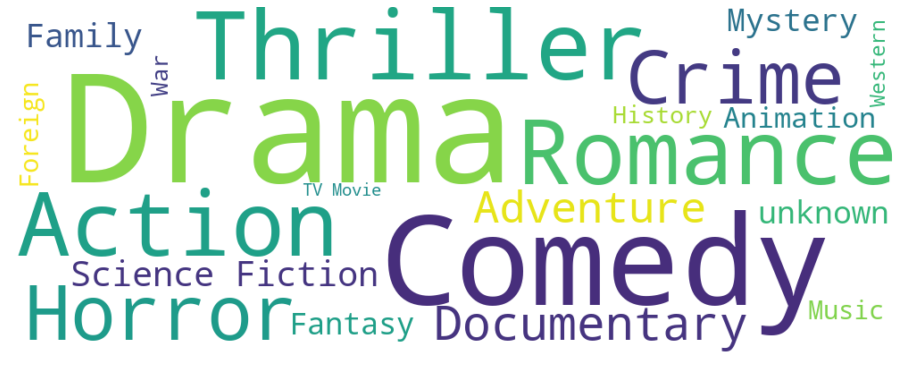

In [ ]:
genre_wc = WordCloud(width=1000,height=400,background_color='white')
genre_wc.generate_from_frequencies(genre_popularity.to_dict())
plt.figure(figsize=(16, 8))
plt.imshow(genre_wc, interpolation="bilinear")
plt.axis('off')
plt.savefig("wordcloud.pdf")

As you can see, the most frequent genres are Drama, Comedy and Action. We then have some other genres that are way less frequent such as Western, Fantasy or Sci-Fi. As I previously pointed out, the latter are those that we want to give the most importance to when recommending. But, why is that?

As an example let’s consider a user who wants to find a movie similar to “The Good, the Bad and the Ugly”, which is a mixture of Western, Action and Adventure. Which genre do you think will be more relevant in terms of recommending a movie to this user? Presumably Western, since there will be many Action or Adventure movies, which are not Western, which could lead to recommending many none Western movies.

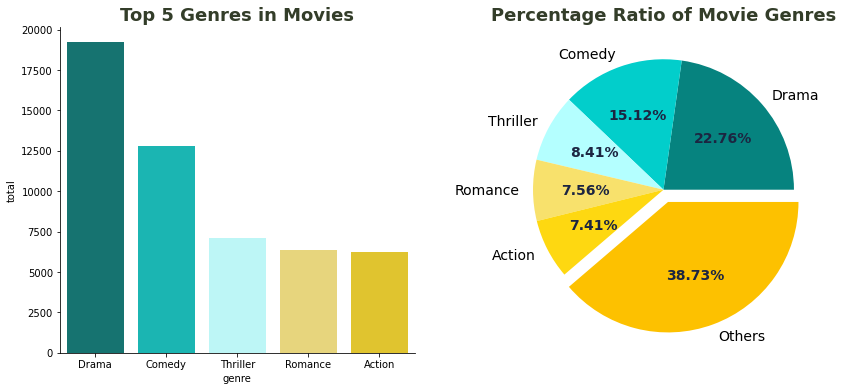

In [ ]:
genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
ax = sns.barplot(data=df_plot, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'genre': 'Others', 'total':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['total'], labels=df_plot['genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')
plt.savefig("genres_ratio.pdf")

The most popular genre, with almost 18000 films, is drama.

There are still numerous genres in the dataset in addition to the top 5 genres. They control 38.67% of all movie genres.

In [ ]:
original_language_list = []
for i in df['original_language']:
    original_language_list.extend(i.split(', '))
    
spoken_languages_list = []
for i in df['spoken_languages']:
    if i != '':
        spoken_languages_list.extend(i.split(', '))

actors_list = []
for i in df['actors']:
    if i != '':
        actors_list.extend(i.split(', '))
        
crew_list = []
for i in df['crew']:
    if i != '':
        crew_list.extend(i.split(', '))

company_list = []
for i in df['production_companies']:
    if i != '':
        company_list.extend(i.split(', '))
    
country_list = []
for i in df['production_countries']:
    if i != '':
        country_list.extend(i.split(', '))

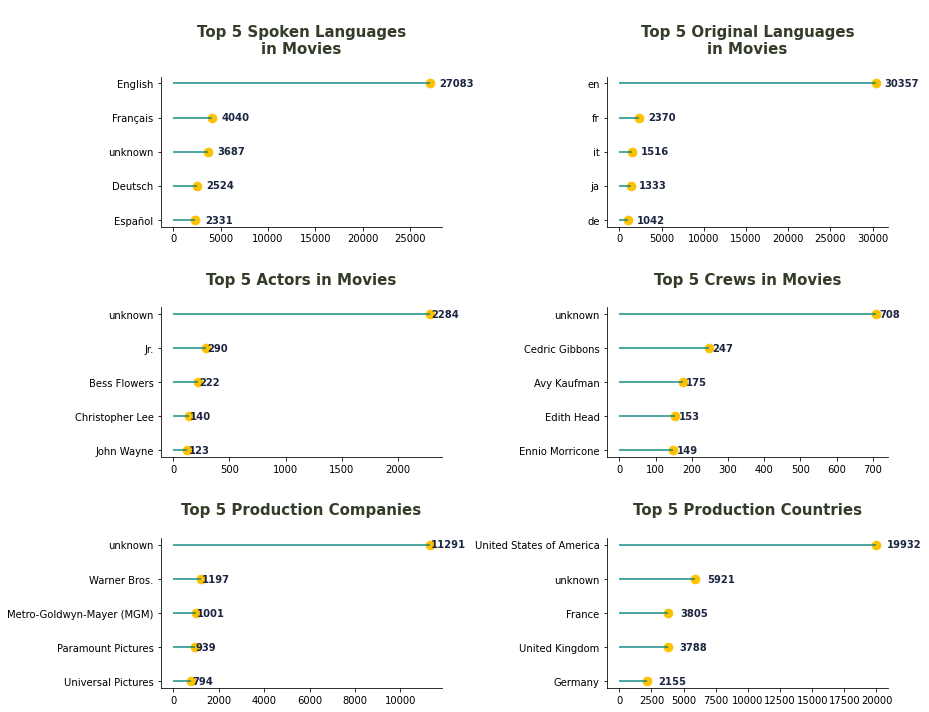

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))

# Spoken language plot
df_plot1 = pd.DataFrame(Counter(spoken_languages_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,0].hlines(y=df_plot1['language'], xmin=0, xmax=df_plot1['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,0].scatter(x=df_plot1['total'], y=df_plot1['language'], s = 75, color='#fdc100')
axes[0,0].set_title('\nTop 5 Spoken Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot1['total']):
    axes[0,0].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Original Language plot
df_plot2 = pd.DataFrame(Counter(original_language_list).most_common(5), columns=['language', 'total']).sort_values(by='total', ascending=True)
axes[0,1].hlines(y=df_plot2['language'], xmin=0, xmax=df_plot2['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[0,1].scatter(x=df_plot2['total'], y=df_plot2['language'], s = 75, color='#fdc100')
axes[0,1].set_title('\nTop 5 Original Languages\nin Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot2['total']):
    axes[0,1].text(value+1000, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
# Actor plot
df_plot3 = pd.DataFrame(Counter(actors_list).most_common(5), columns=['actor', 'total']).sort_values(by='total', ascending=True)
axes[1,0].hlines(y=df_plot3['actor'], xmin=0, xmax=df_plot3['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,0].scatter(x=df_plot3['total'], y=df_plot3['actor'], s = 75, color='#fdc100')
axes[1,0].set_title('\nTop 5 Actors in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot3['total']):
    axes[1,0].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
# Crew plot
df_plot4 = pd.DataFrame(Counter(crew_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[1,1].hlines(y=df_plot4['name'], xmin=0, xmax=df_plot4['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[1,1].scatter(x=df_plot4['total'], y=df_plot4['name'], s = 75, color='#fdc100')
axes[1,1].set_title('\nTop 5 Crews in Movies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot4['total']):
    axes[1,1].text(value+10, i, value, va='center', fontsize=10, weight=600, color='#1c2541')

# Company plot
df_plot5 = pd.DataFrame(Counter(company_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,0].hlines(y=df_plot5['name'], xmin=0, xmax=df_plot5['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[2,0].scatter(x=df_plot5['total'], y=df_plot5['name'], s = 75, color='#fdc100')
axes[2,0].set_title('\nTop 5 Production Companies\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot5['total']):
    axes[2,0].text(value+50, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
# Country plot
df_plot6 = pd.DataFrame(Counter(country_list).most_common(5), columns=['name', 'total']).sort_values(by='total', ascending=True)
axes[2,1].hlines(y=df_plot6['name'], xmin=0, xmax=df_plot6['total'], color= '#06837f', alpha=0.7, linewidth=2)
axes[2,1].scatter(x=df_plot6['total'], y=df_plot6['name'], s = 75, color='#fdc100')
axes[2,1].set_title('\nTop 5 Production Countries\n', fontsize=15, weight=600, color='#333d29')
for i, value in enumerate(df_plot6['total']):
    axes[2,1].text(value+900, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    
sns.despine()
plt.tight_layout()
plt.savefig("top5.pdf")

English is the most often used original and spoken language in movies for this particular dataset.

The list's most prominent actors and crew members are Jr. and Cedric Gibbons, respectively.

With 1194 films, Warner Bros. tops the list as the most prolific production firm.

The USA is home to several excellent production businesses. Thus, it is not surprising that the USA has overtaken China as our top producing nation.

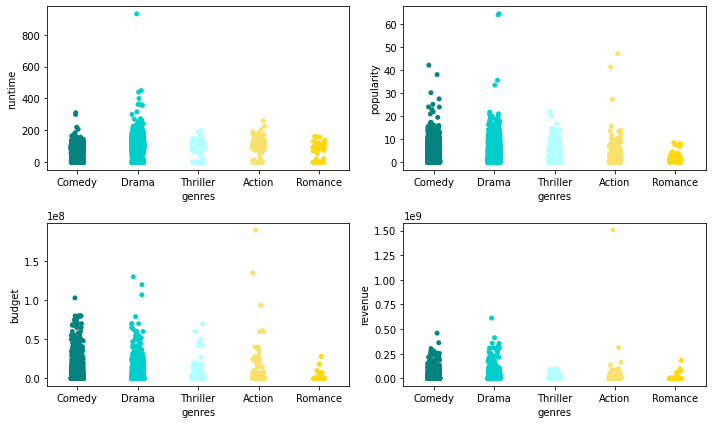

In [ ]:
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
df_plot = df[df['genres'].isin(df_plot['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

#plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'popularity', 'budget', 'revenue']):
    sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()
plt.savefig("genres_distribution.pdf")

Drama is the film genre with the longest duration.

Romance is the least well-liked of the top 5 genres.

The cost of action films was higher than that of other films.

Compared to the others, one of the action films made a huge profit.

In [ ]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'tagline', 'vote_average', 'vote_count', 'keywords', 'crew', 'year',
       'month', 'day', 'day_name', 'characters', 'actors'],
      dtype='object')

# Model 

In [ ]:
df.columns

Index(['adult', 'budget', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'tagline', 'vote_average', 'vote_count', 'keywords', 'crew', 'year',
       'month', 'day', 'day_name', 'characters', 'actors'],
      dtype='object')

In [ ]:
df.isna().sum()/len(df)*100

adult                   0.0
budget                  0.0
genres                  0.0
id                      0.0
original_language       0.0
original_title          0.0
overview                0.0
popularity              0.0
production_companies    0.0
production_countries    0.0
revenue                 0.0
runtime                 0.0
spoken_languages        0.0
tagline                 0.0
vote_average            0.0
vote_count              0.0
keywords                0.0
crew                    0.0
year                    0.0
month                   0.0
day                     0.0
day_name                0.0
characters              0.0
actors                  0.0
dtype: float64

In [ ]:
def combine_features(row): 
    # assert isinstance(row['original_title'], str) and  isinstance(row['genres'], str) and isinstance(row['overview'], str), \
    # f"Wrong: \n>>row['original_title']: {type(row['original_title'])}, {row['original_title']} \n>>row['genres']: {type(row['genres'])}, {row['genres']}, \n>>row['overview']: {type(row['overview'])}, {row['overview']}"   
    title = '' if row['original_title'] == 'unknown' else row['original_title']
    genres = '' if row['genres'] == 'unknown' else row['genres']
    actors = '' if row['actors'] == 'unknown' else row['actors']
    overview = '' if row['overview'] == 'unknown' else row['overview']
    features = str(title) + ', ' + str(genres) + ', ' + str(actors) + ', ' + str(overview)
    return features

In [ ]:
df['combined_value'] = df.apply(combine_features, axis= 1)

In [ ]:
def get_length_input(row): 
    return len(row['combined_value'].split())

In [ ]:
df['length_input'] = df.apply(get_length_input, axis=1)

In [ ]:
max(df['length_input'])

691

In [ ]:
df[df['length_input'] > 450] 

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,keywords,crew,year,month,day,day_name,characters,actors,combined_value,length_input
922,False,6000000,"Adventure, Comedy, Family, Fantasy, Romance",2897,en,Around the World in Eighty Days,Based on the famous book by Jules Verne the mo...,6.164,Michael Todd Company,United States of America,...,"usa, jules verne, bet, detective, asia, europe...","Jules Verne, Michael Anderson, James Poe, Jule...",1956,10,17,Wednesday,"Phileas Fogg, Passepartout, Whist Partner, Ral...","David Niven, Cantinflas, Finlay Currie, Robert...","Around the World in Eighty Days, Adventure, Co...",691
924,False,1500000,"Comedy, Drama",3083,en,Mr. Smith Goes to Washington,"Naive and idealistic Jefferson Smith, leader o...",8.170,Columbia Pictures,United States of America,...,"corruption, washington d.c., senate, senator, ...","Frank Capra, Sidney Buchman, Frank Capra, Jose...",1939,10,19,Thursday,"Jefferson Smith, Clarissa Saunders, Sen. Josep...","James Stewart, Jean Arthur, Claude Rains, Edwa...","Mr. Smith Goes to Washington, Comedy, Drama, J...",531
10979,False,0,"Drama, Western",43837,en,Union Pacific,One of the last bills signed by President Linc...,1.379,Paramount Pictures,United States of America,...,unknown,"Hans Dreier, Cecil B. DeMille, Cecil B. DeMill...",1939,5,5,Friday,"Mollie Monahan, Jeff Butler, Fiesta, Dick Alle...","Barbara Stanwyck, Joel McCrea, Akim Tamiroff, ...","Union Pacific, Drama, Western, Barbara Stanwyc...",462
18453,False,75000000,"Comedy, Drama, Music, Romance",80585,en,Rock of Ages,A small town girl and a city boy meet on the S...,12.555,"New Line Cinema, Offspring Entertainment, Corn...",United States of America,...,"musical, rocker, teenager, young love, rock sta","Adam Shankman, Jennifer Gibgot, Garrett Grant,...",2012,6,13,Wednesday,"Sherrie Christian, Drew Boley, Stacee Jaxx, De...","Julianne Hough, Diego Boneta, Tom Cruise, Alec...","Rock of Ages, Comedy, Drama, Music, Romance, J...",512
37459,False,120000000,"Action, Thriller",324668,en,Jason Bourne,The most dangerous former operative of the CIA...,19.140,"The Kennedy/Marshall Company, Captivate Entert...","United Kingdom, United States of America, China",...,"assassin, amnesia, flashback","Paul Greengrass, Robert Ludlum, Barry Ackroyd,...",2016,7,27,Wednesday,"Jason Bourne, Heather Lee, Robert Dewey, Asset...","Matt Damon, Alicia Vikander, Tommy Lee Jones, ...","Jason Bourne, Action, Thriller, Matt Damon, Al...",474


In [ ]:
df['index'] = [i for i in range(0, len(df))]

In [ ]:
def title(index): 
    return df[df.index == index][['original_title', 'genres', 'actors', 'overview']].values[0]

def index(original_title): 
    return df[df.original_title == original_title]["index"].values[0]

## create model 

In [ ]:
bert = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
#Get embedding 
sentence_embeddings = bert.encode(df['combined_value'].tolist())

In [ ]:
sentence_embeddings.shape

(43287, 768)

In [ ]:
similarity = cosine_similarity(sentence_embeddings)

In [ ]:
similarity.shape

(43287, 43287)

In [ ]:
def recommend(movie_name, top_k=5): 
    movie_rec = sorted(list(enumerate(similarity[index(movie_name)])), key = lambda x: x[1], reverse = True)
    movies = []
    scores = []
    for i in range(top_k): 
        movies.append(title(movie_rec[i][0]))
        scores.append(movie_rec[i][1])
    df = pd.DataFrame(movies, columns=['Tile', 'Genres', 'Actors', 'Overview'])
    df["cosine_similarity"] = scores
    return df#"\n".join(movies)


In [ ]:
def save_table_result(data, file): 
    dfi.export(data, f"{file}.png")
    image_1 = Image.open(f"{file}.png")
    im_1 = image_1.convert('RGB')
    im_1.save(f"{file}.pdf")

In [ ]:
result = recommend("Toy Story 2", 10)
result

,Tile,Genres,Actors,Overview,cosine_similarity
0,Toy Story 2,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Joan Cusack, Kelsey Gram...","Andy heads off to Cowboy Camp, leaving his toy...",1.000000
1,The Land Before Time X: The Great Longneck Mig...,"Adventure, Animation, Family","John Ingle, Alec Medlock, Kenneth Mars, Miriam...",A bedtime story leads Littlefoot and his grand...,0.820969
2,101 Dalmatians II: Patch's London Adventure,"Animation, Family","Barry Bostwick, Jason Alexander, Martin Short,...","Being one of 101 takes its toll on Patch, who ...",0.806121
3,Pooh's Grand Adventure: The Search for Christo...,"Animation, Family","Jim Cummings, John Fiedler, Ken Sansom, Andre ...",A full length animated film for all the family...,0.805678
4,Toy Story 3,"Animation, Family, Comedy","Tom Hanks, Tim Allen, Ned Beatty, Joan Cusack,...","Woody, Buzz, and the rest of Andy's toys haven...",0.799586
5,Brigsby Bear,"Comedy, Drama","Kyle Mooney, Claire Danes, Mark Hamill, Greg K...",Brigsby Bear Adventures is a children's TV sho...,0.799424
6,Tom and Jerry's Giant Adventure,"Animation, Family","Garrison Keillor, Paul Reubens, Grey Griffin, ...",Tom And Jerry are among the last animals livin...,0.792495
7,Spooky Buddies,"Comedy, Family","Sierra McCormick, Harland Williams, Elisa Dono...",Disney's irresistible talking puppies are back...,0.790098
8,The Flintstones,"Fantasy, Comedy, Family","John Goodman, Elizabeth Perkins, Rick Moranis,...",Modern Stone Age family the Flintstones hit th...,0.785946
9,Shrek 2,"Adventure, Animation, Comedy, Family, Fantasy","Mike Myers, Eddie Murphy, Cameron Diaz, Julie ...","Shrek, Fiona and Donkey set off to Far, Far Aw...",0.783484


In [ ]:
save_table_result(result, "titanic")